<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [38]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=15)

In [40]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25,random_state=15)

In [41]:
# SVM classifier with rbf kernel
RBF_SVM =SVC(kernel="rbf",C=100,gamma=0.001) 

In [42]:
RBF_SVM.fit(x_train,y_train)

SVC(C=100, gamma=0.001)

In [43]:
sup_vecs=RBF_SVM.support_vectors_   
dual_coefs=RBF_SVM.dual_coef_
intercept=RBF_SVM.intercept_

Reference - https://stackoverflow.com/questions/28503932/calculating-decision-function-of-svm-manually

In [44]:
def decision_function(x_cv,gamma):
    
    predict=[]
    decision=[]
    for xq in x_cv:
        dec_func = 0
        for j in range(len(sup_vecs)):
             norm2 = np.linalg.norm(sup_vecs[j, :] -xq)**2  # calculating the kernel(K(xi,xq)
             dec_func = dec_func + dual_coefs[0, j] * np.exp(-gamma*norm2) # calculating the sign
        dec_func += intercept
        decision.append(dec_func)
        if (dec_func)<0:                
            predict.append(0)
        else:
            predict.append(1)
    return np.array(predict),decision

In [45]:
#x=dual_coefs[0, 2]
#x

In [46]:
gamma=0.001
f_cv,decision=decision_function(x_cv,gamma)
#print(f_cv)

In [47]:
print(np.array(decision).T)

[[ 9.78553590e-01 -1.11760405e+00 -2.04720532e+00 -3.09565428e+00
  -2.79889732e+00 -3.19223178e+00 -3.06506013e+00 -2.65326082e+00
   3.33031294e+00 -1.27804286e+00  1.23713395e+00 -2.26620102e+00
   1.15545642e+00  1.55336237e+00 -3.18756150e-01  1.20293177e+00
   1.88290414e+00  1.19637781e+00 -2.78451489e-01 -2.12325762e+00
   1.96221487e+00 -4.75759780e-01  1.08589552e+00 -2.55752818e+00
  -2.89278575e+00 -2.43600679e+00 -3.82456176e+00 -2.45783486e+00
  -2.27106674e+00 -1.23683699e+00 -1.16338685e+00 -2.10126553e+00
  -1.80723683e+00 -2.97522570e+00 -1.78272899e+00 -2.57605838e+00
   1.08577450e+00 -1.38072948e-01 -2.30545739e+00 -2.29909830e+00
   7.42068597e-01 -2.97019249e+00 -2.90071729e+00  1.41309686e+00
   2.78861618e+00 -1.89767766e+00 -1.98425643e+00 -1.45561992e+00
  -2.89596097e+00 -2.67027549e+00 -2.39828370e+00 -3.04643574e+00
  -1.56860504e+00  3.60540603e-01 -1.74975096e+00 -1.77366133e+00
  -2.78686913e+00 -2.13619233e+00 -1.90398564e+00  1.33960705e+00
  -3.24020

In [48]:
RBF_SVM.decision_function(x_cv)

array([ 9.78553590e-01, -1.11760405e+00, -2.04720532e+00, -3.09565428e+00,
       -2.79889732e+00, -3.19223178e+00, -3.06506013e+00, -2.65326082e+00,
        3.33031294e+00, -1.27804286e+00,  1.23713395e+00, -2.26620102e+00,
        1.15545642e+00,  1.55336237e+00, -3.18756150e-01,  1.20293177e+00,
        1.88290414e+00,  1.19637781e+00, -2.78451489e-01, -2.12325762e+00,
        1.96221487e+00, -4.75759780e-01,  1.08589552e+00, -2.55752818e+00,
       -2.89278575e+00, -2.43600679e+00, -3.82456176e+00, -2.45783486e+00,
       -2.27106674e+00, -1.23683699e+00, -1.16338685e+00, -2.10126553e+00,
       -1.80723683e+00, -2.97522570e+00, -1.78272899e+00, -2.57605838e+00,
        1.08577450e+00, -1.38072948e-01, -2.30545739e+00, -2.29909830e+00,
        7.42068597e-01, -2.97019249e+00, -2.90071729e+00,  1.41309686e+00,
        2.78861618e+00, -1.89767766e+00, -1.98425643e+00, -1.45561992e+00,
       -2.89596097e+00, -2.67027549e+00, -2.39828370e+00, -3.04643574e+00,
       -1.56860504e+00,  

## Observations -

Both decision functions output are same.

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm


In [49]:
import numpy as np
import math as m
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [50]:
# Creating Dataset
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=15)

In [52]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25,random_state=15)

In [53]:
RBF_SVM =SVC(kernel="rbf",C=100,gamma=0.001,random_state=12)

In [54]:
RBF_SVM.fit(x_train,y_train)

SVC(C=100, gamma=0.001, random_state=12)

In [55]:
sup_vecs=RBF_SVM.support_vectors_
dual_coefs=RBF_SVM.dual_coef_
intercept=RBF_SVM.intercept_

In [56]:
def decision_function(x_cv,gamma):
    
    predict=[]
    decision=[]
    for xq in x_cv:
        dec_func = 0
        for j in range(len(sup_vecs)):
             norm2 = np.linalg.norm(sup_vecs[j, :] -xq)**2  # calculating the kernel(K(xi,xq)
             dec_func = dec_func + dual_coefs[0, j] * np.exp(-gamma*norm2) # calculating the sign
        dec_func += intercept
        decision.append(dec_func)
        if (dec_func)<0:                
            predict.append(0)
        else:
            predict.append(1)
    return np.array(decision)

In [57]:
# calculating f_cv based on decision function by passing x_cv
gamma=0.001
f_cv=decision_function(x_cv,gamma)
#print(f_cv)

In [58]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w.T)+b))) #return 1/1+e(-x)

def logloss(w,x,y,b,reg=0):
    val=sigmoid(w,x,b)
    return -np.mean(y*np.log10(val)+(1-y)*np.log10(1-val))+reg  # cost function of logistic regression

In [59]:
# calculating y+ and y- values from ytrain

count_one=list(y_train).count(1)
count_zero=list(y_train).count(0) 

y_plus=(count_one+1)/(count_one+2)
y_minus=1/(count_zero+2)

In [60]:
# update function converting y_cv(0 and 1) into y+,y_
def update(y_cv,y_plus,y_minus):
    updated_cv=[]
    for point in y_cv:   
        if point==1:
            updated_cv.append(y_plus)
        else:
            updated_cv.append(y_minus)
    return(np.array(updated_cv))     

In [61]:
y_cv=update(y_cv,y_plus,y_minus)

In [62]:
# initialize weight vector
w = np.zeros_like(f_cv[1])
# initial intercept value
b = 0
eta0  = 0.0001  # learning rate
alpha = 0.0001 # lambda value
N = len(f_cv)
print(len(y_cv))
print(N)

1000
1000


In [63]:
initial_log_loss =logloss(w,f_cv,y_cv,b)
print("Initial log loss =",initial_log_loss)

Initial log loss = 0.3010299956639812


### SGD alorithm for calculating optimal w and b

In [64]:
def sgd(f_cv,y_cv,eta0,alpha,w,b,epoch):
    t=0.001 # tolerence
    test_loss=[]
    epoc=[]
    for i in  range(0,epoch): 
        epoc.append(i)
        for j in range(0,N):
            reg=alpha/2*np.dot(w.T,w) #regulrization term
            w = ((1-eta0*(alpha/N))*w)+((eta0*f_cv[j])*(y_cv[j]-sigmoid(w,f_cv[j],b))) # updating weight vector
            b = b+(eta0*(y_cv[j]-sigmoid(w,f_cv[j],b)))       # updating intercept    
        test=logloss(w,f_cv,y_cv,b,reg)
        test_loss.append(test)
        if i<=t : 
            continue                                                                  
            if abs(test_loss[i]-test_loss[i-1])>t: # check convergence 
                continue
            else:
                break 
    return w,b,epoc,test_loss

In [65]:
epoch=45
w,b,epo,loss=sgd(f_cv,y_cv,eta0, alpha,w,b,epoch)
print("optimal weight = ",w)
print("optimal intercept = ",b)

optimal weight =  [1.14564518]
optimal intercept =  -0.16160904884095137


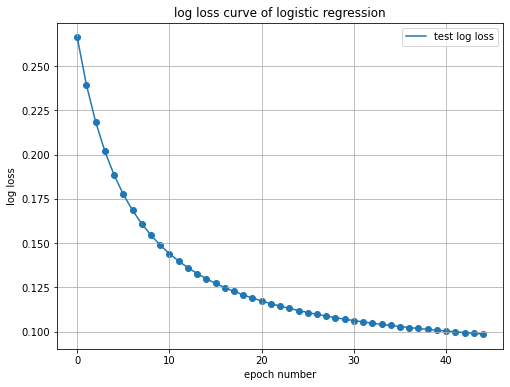

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epo,loss, label='test log loss')
plt.scatter(epo,loss)
plt.title('log loss curve of logistic regression')
plt.xlabel('epoch number')
plt.ylabel("log loss")
plt.legend()

In [68]:
# Compute ftest by passing Xtest to the decision function
f_test=decision_function(x_test,gamma)

In [76]:
def probability(f_test,w,b):
    p=1/(1+np.exp(-w*f_test+b)) #calculate probilty P(Y=1|X)
    return np.round(p,3)

In [77]:
prob=probability(f_test,w,b)
print(prob[:15])

[[0.237]
 [0.917]
 [0.268]
 [0.676]
 [0.002]
 [0.926]
 [0.181]
 [0.905]
 [0.187]
 [0.881]
 [0.113]
 [0.887]
 [0.072]
 [0.025]
 [0.025]]
